<!--NOTEBOOK_INFORMATION-->
<img id="r-1060983" data-claire-element-id="1061343" src="http://www.siteduzero.com/favicon.ico" alt="Image utilisateur">
    <p>
        **<font color='#D2691E'size="6">Projet n°7 : Indexations automatiques d'images, ANNEXE (2/2)</font>**.
    </p>
    <p>
        Ce notebook permet d'analyser les résultats issus de l'apprentissage de différents réseaux de neurones (notebook "2_approche_CNN__ANNEXE_transfer_learning_feature_extraction_over_parameters").
    </p>

<p>
    <center>
        **<font color='	#D2691E'size="6">PLAN</font>**
    </center>
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>
<p>
        **<font color='#D2691E'size="4">I) Preprocessing over the results</font>**
</p>
<p>
        **<font color='#D2691E'size="4">II) Vizualizing the accuracy depending on the parameters</font>**
</p>
<p>
        **<font color='#D2691E'size="4">III) Vizualizing the losses and accuracies depending on the training epochs</font>**
</p>

<p>
        **<font color='#D2691E'size="4">0) Libraries, functions and datasources import</font>**
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from functions import convert_in_list

In [31]:
df_evaluation = pd.read_csv('df_evaluation_learning_rates.csv')
df_evaluation.drop('Unnamed: 0', axis=1, inplace=True)
df_evaluation

,races,training_len,testing_len,iter_number,n_races,random_selection_number,batch_size,learning_rate,fitting_time,prediction_time,epochs_losses,epochs_accuracies,epochs_val_losses,epochs_val_accuracies,test_loss,test_accuracy,is_augmented,optimizer,learning_rate_categ,run
0,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,0,12,0,100,0.000046,3077,125,"[11.177390171632402, 5.857689602159346, 2.6551...","[0.18174409032013714, 0.5069274632252613, 0.74...","[15.50204170040968, 15.00998678440001, 12.2796...","[0.0, 0.029268292483033205, 0.2048780423838918...",3.816269,0.722826,False,sgd,"[1e-5,5e-5]",run_1
1,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,1,12,0,100,0.000089,3454,122,"[10.441518563610224, 5.4293057353105985, 3.884...","[0.23553382233088835, 0.5973920026443407, 0.71...","[15.783933965171256, 12.326112328506097, 12.78...","[0.002439024335727459, 0.19268292479398774, 0....",3.838663,0.733696,False,sgd,"[5e-5,1e-4]",run_1
2,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,2,12,0,100,0.000443,2209,122,"[9.8417969667144, 5.32107679107467, 4.79954731...","[0.31621842245406606, 0.6479217584966739, 0.68...","[12.235719762197355, 11.661158957132479, 11.52...","[0.21219512674866653, 0.2682926887419166, 0.27...",7.138068,0.543478,False,sgd,"[1e-4,5e-4]",run_1
3,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,3,12,0,100,0.000753,1477,122,"[10.426884437054275, 7.350310457364854, 9.7848...","[0.29910350730604723, 0.5264873691662211, 0.38...","[16.118097258777155, 16.118097258777155, 16.11...","[0.0, 0.0, 0.0, 0.0]",10.832995,0.327899,False,sgd,"[5e-4,1e-3]",run_1
4,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,4,12,0,100,0.004071,1475,122,"[14.32642020184331, 14.633708820949265, 14.633...","[0.09942950298000179, 0.09209453961838526, 0.0...","[16.118097258777155, 16.118097258777155, 16.11...","[0.0, 0.0, 0.0, 0.0]",15.008516,0.068841,False,sgd,"[1e-3,5e-3]",run_1
5,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,5,12,0,100,0.005730,1477,122,"[14.377608573621332, 14.35784860733766, 14.357...","[0.10268948660721697, 0.10920945234359913, 0.1...","[16.118097258777155, 16.118097258777155, 16.11...","[0.0, 0.0, 0.0, 0.0]",14.804120,0.081522,False,sgd,"[5e-3,1e-2]",run_1
6,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,6,12,1,100,0.000027,1452,113,"[12.859274773210181, 9.429001272356553, 6.2099...","[0.10424028090843042, 0.26855123606461095, 0.4...","[15.520961927989173, 15.956519313590237, 16.03...","[0.00793650775911316, 0.0, 0.0, 0.002645502586...",6.095660,0.547059,False,sgd,"[1e-5,5e-5]",run_1
7,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,7,12,1,100,0.000094,1780,113,"[10.854263379801289, 5.383011704198885, 3.2654...","[0.2049469942812785, 0.5927561940658219, 0.738...","[16.11809730529785, 16.115518347926873, 16.118...","[0.0, 0.0, 0.0, 0.0, 0.0]",5.329826,0.633333,False,sgd,"[5e-5,1e-4]",run_1
8,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,8,12,1,100,0.000462,1361,112,"[9.503772049826363, 6.354559300223846, 6.12258...","[0.34098940186018234, 0.5697879856551072, 0.60...","[16.11809730529785, 16.11809730529785, 16.1180...","[0.0, 0.0, 0.0, 0.0]",8.239412,0.484314,False,sgd,"[1e-4,5e-4]",run_1
9,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,9,12,1,100,0.000946,1362,113,"[10.594130981094846, 9.908407009111276, 10.101...","[0.2985865757488004, 0.3780918724755938, 0.370...","[16.11809730529785, 16.11809730529785, 16.1180...","[0.0, 0.0, 0.0, 0.0]",12.452109,0.227451,False,sgd,"[5e-4,1e-3]",run_1


In [29]:
df_evaluation.columns

Index(['races', 'training_len', 'testing_len', 'iter_number', 'n_races',
       'random_selection_number', 'batch_size', 'learning_rate',
       'fitting_time', 'prediction_time', 'epochs_losses', 'epochs_accuracies',
       'epochs_val_losses', 'epochs_val_accuracies', 'test_loss',
       'test_accuracy', 'is_augmented', 'optimizer', 'learning_rate_categ',
       'run', 'n_epochs', 'final_loss', 'final_accuracy', 'final_val_loss',
       'final_val_accuracy'],
      dtype='object')

<p>
        **<font color='#D2691E'size="4">I) Preprocessing over the results</font>**
</p>

In [30]:
np.max(df_evaluation['test_accuracy'])

0.7644341801385681

In [4]:
for column in ['epochs_losses','epochs_accuracies','epochs_val_losses','epochs_val_accuracies']:
    df_evaluation = convert_in_list(df_evaluation,column)

In [5]:
df_evaluation['epochs_losses'][0]

[11.177390171632402,
 5.857689602159346,
 2.6551777008790354,
 1.5934128820920437,
 1.1124129741290962,
 0.7947726992202563,
 0.7803367870361123,
 0.5023115000900019]

In [6]:
df_evaluation['n_epochs'] = df_evaluation['epochs_losses'].apply(lambda x: len(x))

In [7]:
df_evaluation['final_loss'] = df_evaluation['epochs_losses'].apply(lambda x: x[-1])
df_evaluation['final_accuracy'] = df_evaluation['epochs_accuracies'].apply(lambda x: x[-1])
df_evaluation['final_val_loss'] = df_evaluation['epochs_val_losses'].apply(lambda x: x[-1])
df_evaluation['final_val_accuracy'] = df_evaluation['epochs_val_accuracies'].apply(lambda x: x[-1])
df_evaluation

,races,training_len,testing_len,iter_number,n_races,random_selection_number,batch_size,learning_rate,fitting_time,prediction_time,...,test_accuracy,is_augmented,optimizer,learning_rate_categ,run,n_epochs,final_loss,final_accuracy,final_val_loss,final_val_accuracy
0,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,0,12,0,100,0.000046,3077,125,...,0.722826,False,sgd,"[1e-5,5e-5]",run_1,8,0.502312,0.947025,11.928421,0.239024
1,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,1,12,0,100,0.000089,3454,122,...,0.733696,False,sgd,"[5e-5,1e-4]",run_1,9,0.311288,0.967400,11.619101,0.263415
2,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,2,12,0,100,0.000443,2209,122,...,0.543478,False,sgd,"[1e-4,5e-4]",run_1,6,4.411082,0.719641,12.300757,0.221951
3,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,3,12,0,100,0.000753,1477,122,...,0.327899,False,sgd,"[5e-4,1e-3]",run_1,4,9.715977,0.392013,16.118097,0.000000
4,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,4,12,0,100,0.004071,1475,122,...,0.068841,False,sgd,"[1e-3,5e-3]",run_1,4,14.633709,0.092095,16.118097,0.000000
5,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,5,12,0,100,0.005730,1477,122,...,0.081522,False,sgd,"[5e-3,1e-2]",run_1,4,14.357848,0.109209,16.118097,0.000000
6,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,6,12,1,100,0.000027,1452,113,...,0.547059,False,sgd,"[1e-5,5e-5]",run_1,4,4.070631,0.652827,16.028574,0.002646
7,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,7,12,1,100,0.000094,1780,113,...,0.633333,False,sgd,"[5e-5,1e-4]",run_1,5,1.477193,0.879859,16.117563,0.000000
8,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,8,12,1,100,0.000462,1361,112,...,0.484314,False,sgd,"[1e-4,5e-4]",run_1,4,5.677927,0.639576,16.118097,0.000000
9,"['brabancon_griffon', 'cairn', 'cocker_spaniel...",1510,510,9,12,1,100,0.000946,1362,113,...,0.227451,False,sgd,"[5e-4,1e-3]",run_1,4,10.009441,0.376325,16.118097,0.000000


In [8]:
df_evaluation['learning_rate_categ'] = ''
df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>5e-6)&(df_evaluation['learning_rate']<1e-5)] = '[5e-6,1e-5]'
df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>1e-5)&(df_evaluation['learning_rate']<5e-5)] = '[1e-5,5e-5]'

df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>5e-5)&(df_evaluation['learning_rate']<1e-4)] = '[5e-5,1e-4]'

df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>1e-4)&(df_evaluation['learning_rate']<5e-4)] = '[1e-4,5e-4]'

df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>5e-4)&(df_evaluation['learning_rate']<1e-3)] = '[5e-4,1e-3]'
df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>1e-3)&(df_evaluation['learning_rate']<5e-3)] = '[1e-3,5e-3]'
df_evaluation['learning_rate_categ'][(df_evaluation['learning_rate']>5e-3)&(df_evaluation['learning_rate']<1e-2)] = '[5e-3,1e-2]'

c:\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarn

In [9]:
list(np.unique(df_evaluation['learning_rate_categ']))

['[1e-3,5e-3]',
 '[1e-4,5e-4]',
 '[1e-5,5e-5]',
 '[5e-3,1e-2]',
 '[5e-4,1e-3]',
 '[5e-5,1e-4]',
 '[5e-6,1e-5]']

<p>
        **<font color='#D2691E'size="4">II) Vizualizing the accuracy depending on the parameters</font>**
</p>

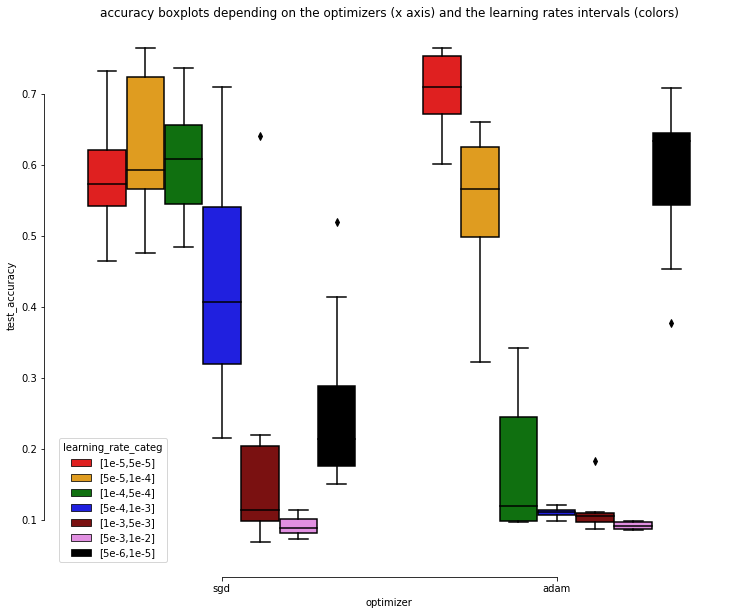

In [10]:
plt.figure(figsize=(12,10))
plt.title('accuracy boxplots depending on the optimizers (x axis) and the learning rates intervals (colors)')
sns.boxplot(x="optimizer", y="test_accuracy",
            hue="learning_rate_categ", palette=["red","orange", "g","b","darkred","violet","black"],
            data=df_evaluation)
sns.despine(offset=10, trim=True)
#We see, thanks to this distributions, that the more interesting learning rates for our problem are in [5e-6,5e-4]
#In effect, beyond this interval, final accuracies on the test are low

#We can also observe that the sgd optimizer is better in  [1e-5, 5e-4] (highest learning rates of our interval), 
#whereas adam is better in [5e-6,5e-5] (lowest LR)

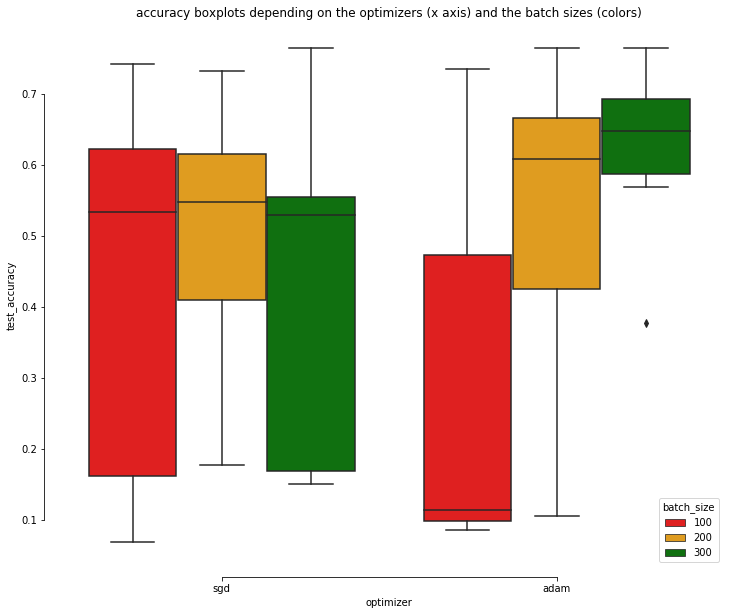

In [33]:
plt.figure(figsize=(12,10))
plt.title('accuracy boxplots depending on the optimizers (x axis) and the batch sizes (colors)')
sns.boxplot(x="optimizer", y="test_accuracy",
            hue="batch_size", palette=["red","orange", "g"],
            data=df_evaluation)
sns.despine(offset=10, trim=True)
#With a batch size of "100", we can observe very huge gaps between accuracy extrema
#Even if there is a huge gap with a batch of 300 on the sgd optimizer, this batch size is interesting because it seems to 
##generate the best of all the accuracies on the amam optimizer

#The batch size of 200 seems to be correct for both sgd and adam optimizers

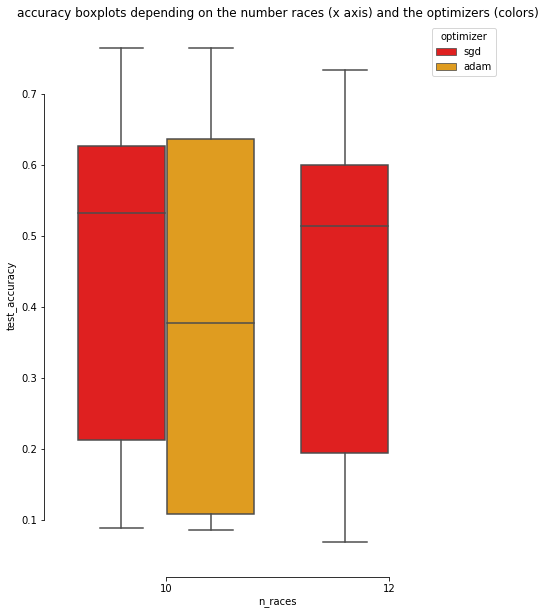

In [11]:
plt.figure(figsize=(8,10))
plt.title('accuracy boxplots depending on the number races (x axis) and the optimizers (colors)')
sns.boxplot(x="n_races", y="test_accuracy",
            hue="optimizer", palette=["red","orange"],
            data=df_evaluation)
sns.despine(offset=10, trim=True)
#with all batch sizes included in the analyzis of the accuracy distribution, we can see that sgd is more stable than adam

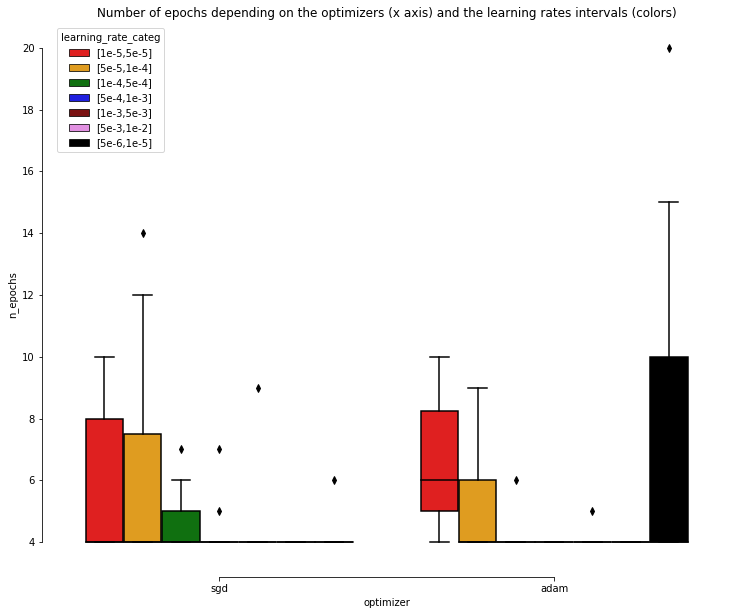

In [12]:
plt.figure(figsize=(12,10))
plt.title('Number of epochs depending on the optimizers (x axis) and the learning rates intervals (colors)')
sns.boxplot(x="optimizer", y="n_epochs",
            hue="learning_rate_categ", palette=["red","orange", "g","b","darkred","violet","black"],
            data=df_evaluation)
sns.despine(offset=10, trim=True)
#This plot confirms what we observed before : the best learning rates are in [5e-6,5e-4] ; out of this interval epochs tends to
## be close to 4 (which is the minimum number of epochs if the validation loss does'nt move)

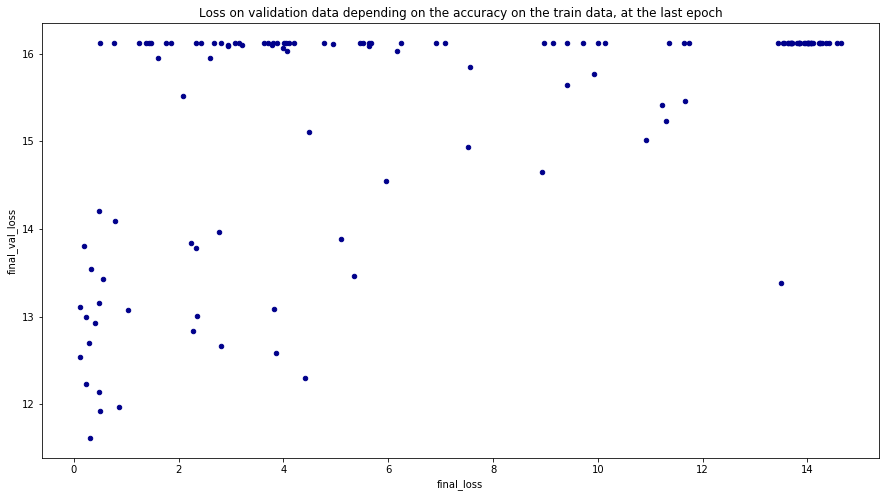

In [14]:
df_evaluation.plot.scatter(x='final_loss',
                           y='final_val_loss',
                           c='DarkBlue',
                           title = 'Loss on validation data depending on the accuracy on the train data, at the last epoch',
                           figsize=(15,8))

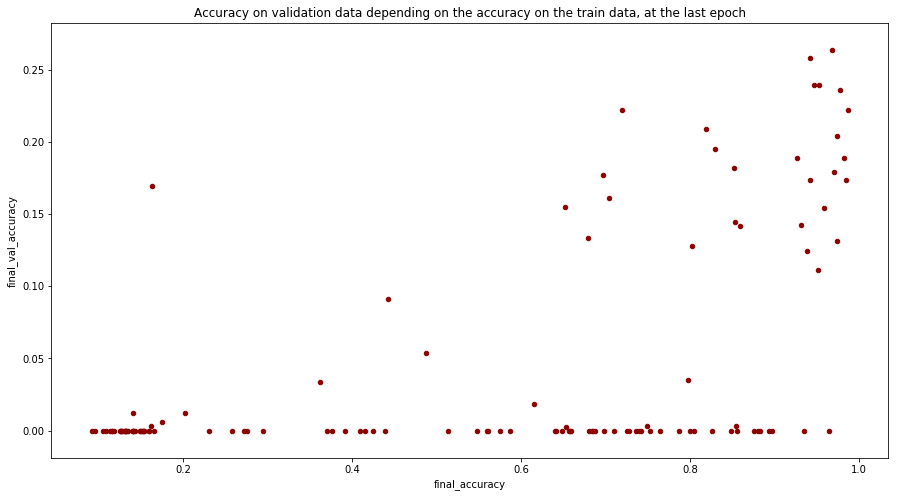

In [15]:
df_evaluation.plot.scatter(x='final_accuracy',
                           y='final_val_accuracy',
                           c='DarkRed',
                           title = 'Accuracy on validation data depending on the accuracy on the train data, at the last epoch',
                           figsize=(15,8))

In [16]:
focus = df_evaluation[df_evaluation['final_val_accuracy']>=.1]
focus

,races,training_len,testing_len,iter_number,n_races,random_selection_number,batch_size,learning_rate,fitting_time,prediction_time,...,test_accuracy,is_augmented,optimizer,learning_rate_categ,run,n_epochs,final_loss,final_accuracy,final_val_loss,final_val_accuracy
0,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,0,12,0,100,0.000046,3077,125,...,0.722826,False,sgd,"[1e-5,5e-5]",run_1,8,0.502312,0.947025,11.928421,0.239024
1,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,1,12,0,100,0.000089,3454,122,...,0.733696,False,sgd,"[5e-5,1e-4]",run_1,9,0.311288,0.967400,11.619101,0.263415
2,"['afghan_hound', 'boxer', 'cairn', 'collie', '...",1637,552,2,12,0,100,0.000443,2209,122,...,0.543478,False,sgd,"[1e-4,5e-4]",run_1,6,4.411082,0.719641,12.300757,0.221951
20,"['black_and_tan_coonhound', 'briard', 'bull_ma...",1227,414,0,10,0,100,0.000065,1672,90,...,0.497585,False,adam,"[5e-5,1e-4]",run_1,6,5.101280,0.679348,13.880275,0.133550
23,"['black_and_tan_coonhound', 'briard', 'bull_ma...",1227,414,3,10,0,100,0.000428,1639,90,...,0.659420,False,sgd,"[1e-4,5e-4]",run_1,6,1.035343,0.926087,13.074652,0.188925
26,"['black_and_tan_coonhound', 'briard', 'bull_ma...",1227,414,6,10,0,100,0.004850,1402,90,...,0.183575,False,adam,"[1e-3,5e-3]",run_1,5,13.490146,0.163043,13.387996,0.169381
41,"['american_staffordshire_terrier', 'appenzelle...",1298,437,21,10,2,100,0.000086,1726,95,...,0.713959,False,sgd,"[5e-5,1e-4]",run_1,6,0.323724,0.958890,13.547871,0.153846
50,"['airedale', 'black_and_tan_coonhound', 'bluet...",1208,407,30,10,3,100,0.000059,1650,89,...,0.636364,False,adam,"[5e-5,1e-4]",run_1,6,2.801164,0.818985,12.663454,0.208609
51,"['airedale', 'black_and_tan_coonhound', 'bluet...",1208,407,31,10,3,100,0.000059,2944,88,...,0.742015,False,sgd,"[5e-5,1e-4]",run_1,11,0.117741,0.986755,12.543878,0.221854
74,"['border_terrier', 'bouvier_des_flandres', 'da...",1285,433,14,10,1,100,0.000026,1746,94,...,0.734411,False,adam,"[1e-5,5e-5]",run_1,6,0.230336,0.977155,12.233704,0.236025


<p>
        **<font color='#D2691E'size="4">II) Vizualizing the losses and accuracies depending on the training epochs</font>**
</p>

In [18]:
df_evaluation['epochs_losses'][0]

[11.177390171632402,
 5.857689602159346,
 2.6551777008790354,
 1.5934128820920437,
 1.1124129741290962,
 0.7947726992202563,
 0.7803367870361123,
 0.5023115000900019]

In [19]:
df_evaluation['epochs_val_losses'][0]

[15.50204170040968,
 15.00998678440001,
 12.279677228229803,
 12.089079135801734,
 11.908222157780717,
 12.508801669609255,
 12.06607127771145,
 11.928420572746091]

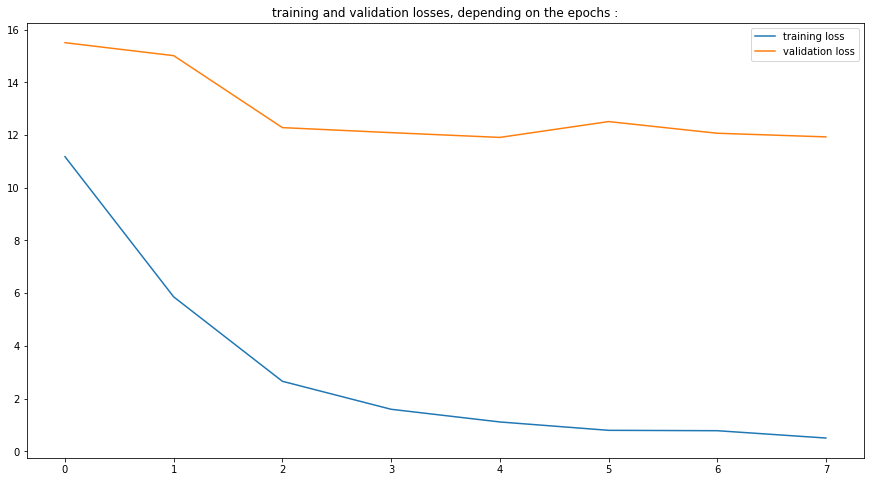

In [27]:
plt.figure(figsize=(15,8))
plt.title("training and validation losses, depending on the epochs :")
x1 = df_evaluation['epochs_losses'][0]
x2 = df_evaluation['epochs_val_losses'][0]
y = range(0,len(x1))

plt.plot(y,x1,label='training loss')
plt.plot(y,x2,label='validation loss')
plt.legend(loc='upper right')
#The training loss is less important than the validation one, which is good : what about the accuracy ? 

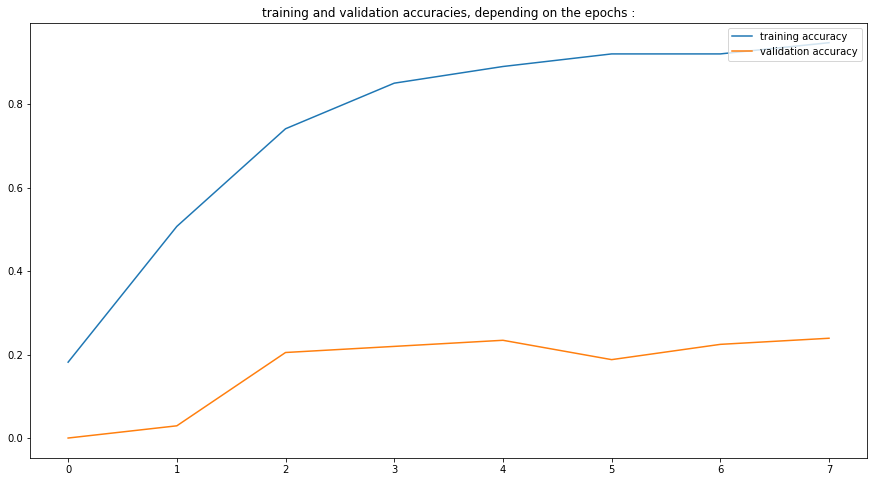

In [28]:
plt.figure(figsize=(15,8))
plt.title("training and validation accuracies, depending on the epochs :")
x1 = df_evaluation['epochs_accuracies'][0]
x2 = df_evaluation['epochs_val_accuracies'][0]
y = range(0,len(x1))

plt.plot(y,x1,label='training accuracy')
plt.plot(y,x2,label='validation accuracy')
plt.legend(loc='upper right')
#The training accuracy is superior than the validation one : this is a good thing too.
#But the training accuracy bursts the validation one : the gap is too important so there is a problem in the learning steps

##Problem fixed : there was a problem with the cross_validation parameters in keras; by specifying the validation data the
###learning steps were quite better (look at the notebook "part_8_CNN_approach_results_analyzis_transfer_learning")